###### The objective of this program is the following:
 
- Chart adjusted closing price
- Calculate daily and monthly returns
- Charting daily and monthly returns
- Histogram to get a sense of how extreme the returns can be 
- Calculate cumulative returns 


###### Activating code auto-complete

In [1]:
%config IPCompleter.greedy=True

###### Importing Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.util.testing import assert_frame_equal
from alpha_vantage.timeseries import TimeSeries
import pandas_datareader as web
import time
import datetime
from matplotlib import style

In [73]:
style.use('default')

###### Parsing API Key from credentials file

In [4]:
with open("api_key.cred", "r") as cred_file:
    for line in cred_file:
        api_key = line.split("=")[1]

###### Storing List of Tickers and Connecting to the API

In [5]:
# List of companies
list_companies = ['AAPL','MSFT','AMZN','FB','BRK.B','JNJ','GOOG','JPM','V','PG']

# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(api_key, output_format='pandas')

###### Extracting Data for each Ticker from API

In [27]:
end = datetime.datetime(2020, 4, 21)
start = datetime.datetime(2018, 4, 1)
market_data_1_symbol = web.DataReader("AAPL", "av-daily-adjusted", start=start, end=end, api_key=api_key)
market_data_1_symbol

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
2018-04-02,167.88,168.9400,164.4700,166.68,162.0400,37586791,0.0,1.0
2018-04-03,167.64,168.7455,164.8800,168.39,163.7024,30278046,0.0,1.0
2018-04-04,164.88,172.0100,164.7700,171.61,166.8328,34605489,0.0,1.0
2018-04-05,172.58,174.2304,172.0800,172.80,167.9896,26933197,0.0,1.0
2018-04-06,170.97,172.4800,168.2000,168.38,163.6927,35005290,0.0,1.0
...,...,...,...,...,...,...,...,...
2020-04-15,282.40,286.3300,280.6300,284.43,284.4300,32788641,0.0,1.0
2020-04-16,287.38,288.1975,282.3502,286.69,286.6900,39281290,0.0,1.0
2020-04-17,284.69,286.9450,276.8600,282.80,282.8000,53812478,0.0,1.0
2020-04-20,277.95,281.6800,276.8500,276.93,276.9300,31987401,0.0,1.0


###### Charting adjusted closing price

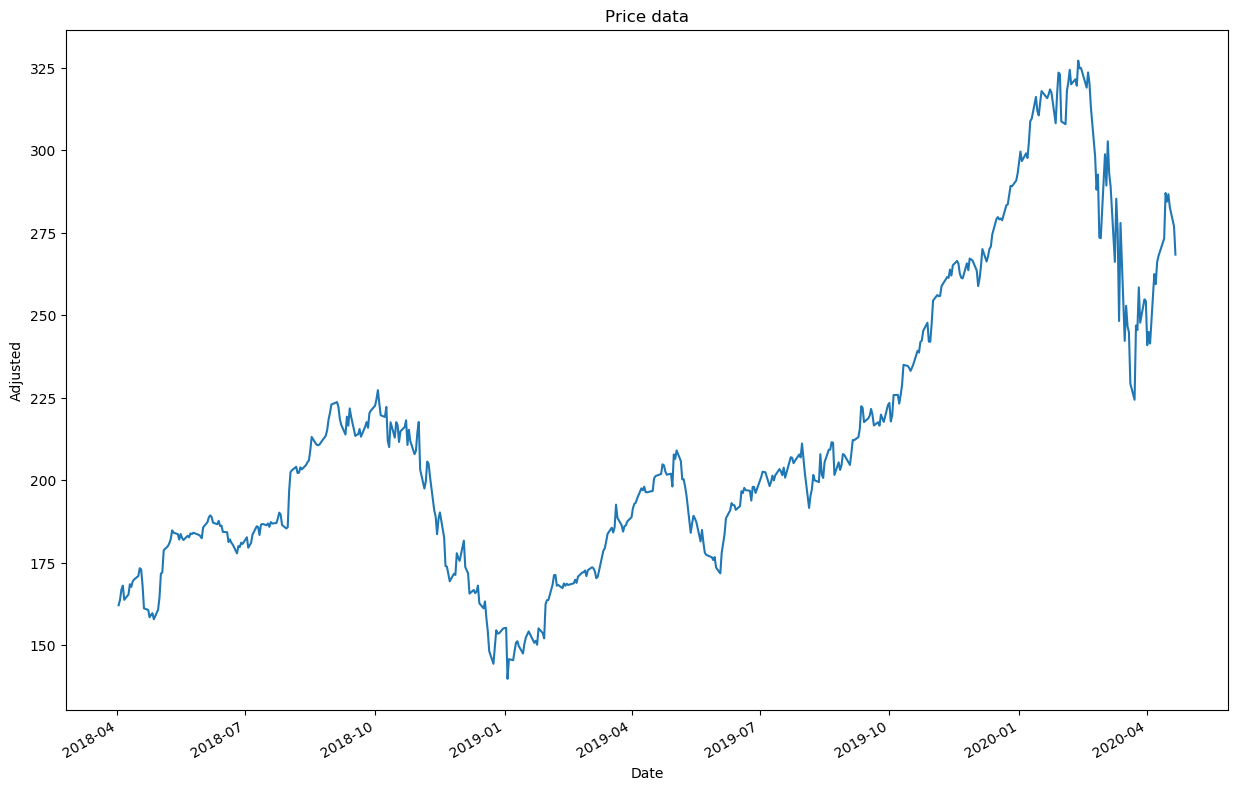

In [74]:
plt.figure(figsize=(15,10))
market_data_1_symbol['adjusted close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Price data")
plt.show()

###### Calculating daily and monthly returns for individual stock

In [40]:
daily_returns = market_data_1_symbol['adjusted close'].pct_change()
daily_returns

2018-04-02         NaN
2018-04-03    0.010259
2018-04-04    0.019123
2018-04-05    0.006934
2018-04-06   -0.025578
                ...   
2020-04-15   -0.009127
2020-04-16    0.007946
2020-04-17   -0.013569
2020-04-20   -0.020757
2020-04-21   -0.030910
Name: adjusted close, Length: 518, dtype: float64

- Pandas dataframe. ffill() function is used to fill the missing value in the dataframe. 'ffill' stands for 'forward fill' and will propagate last valid observation forward.
- Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row.

In [37]:
market_data_1_symbol.index = pd.to_datetime(market_data_1_symbol['adjusted close'].index)
# market_data_1_symbol
monthly_returns = market_data_1_symbol['adjusted close'].resample('M').ffill().pct_change()
monthly_returns

2018-04-30         NaN
2018-05-31    0.135141
2018-06-30   -0.009419
2018-07-31    0.027983
2018-08-31    0.200435
2018-09-30   -0.008303
2018-10-31   -0.030478
2018-11-30   -0.181187
2018-12-31   -0.116698
2019-01-31    0.055154
2019-02-28    0.044771
2019-03-31    0.097025
2019-04-30    0.056436
2019-05-31   -0.124166
2019-06-30    0.130519
2019-07-31    0.076395
2019-08-31   -0.016430
2019-09-30    0.072962
2019-10-31    0.110684
2019-11-30    0.077517
2019-12-31    0.098784
2020-01-31    0.054010
2020-02-29   -0.114673
2020-03-31   -0.069761
2020-04-30    0.055370
Freq: M, Name: adjusted close, dtype: float64

###### Charting Daily and Monthly Returns for Netflix

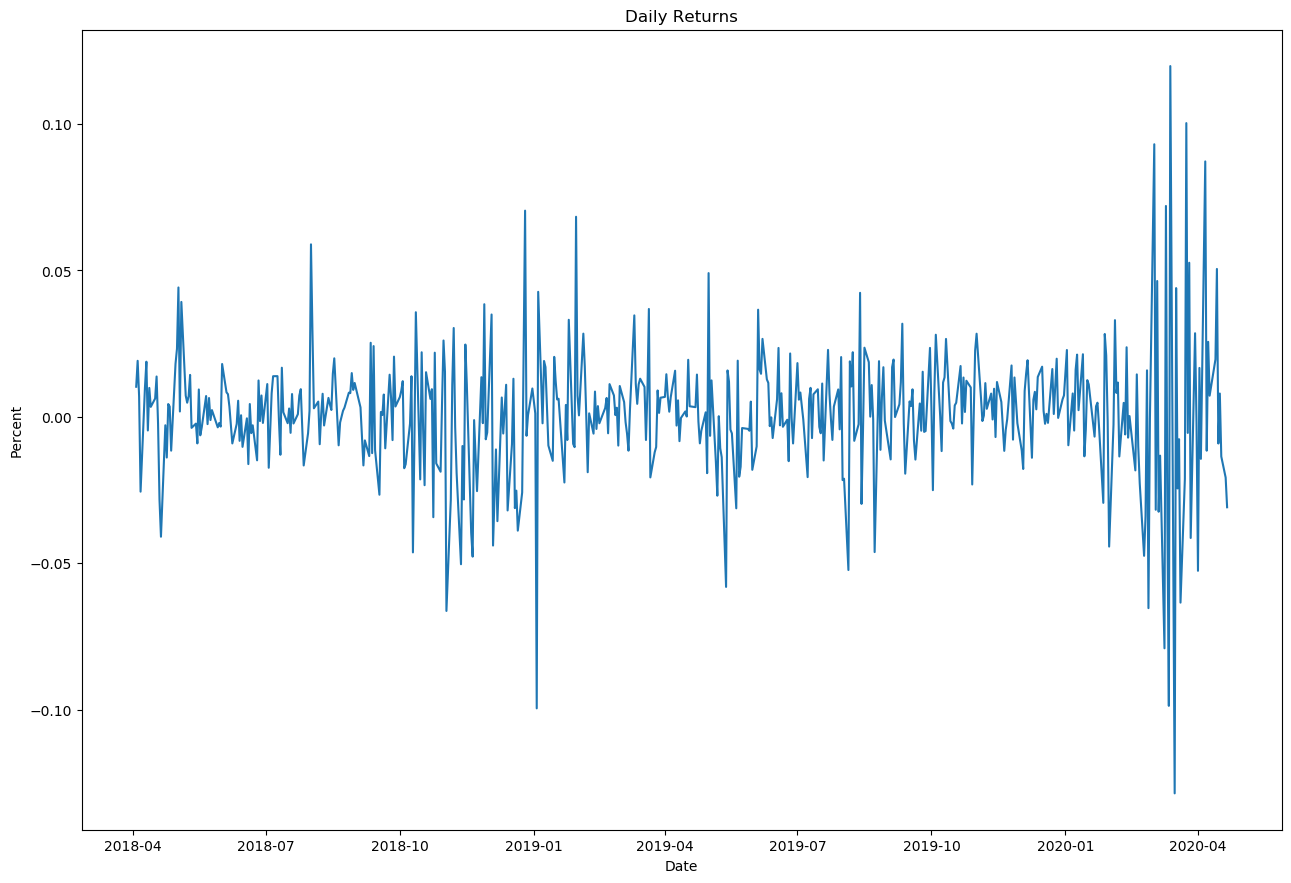

In [75]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
fig.set_size_inches(15.0, 10.0)
ax1.plot(daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Daily Returns")
plt.show()

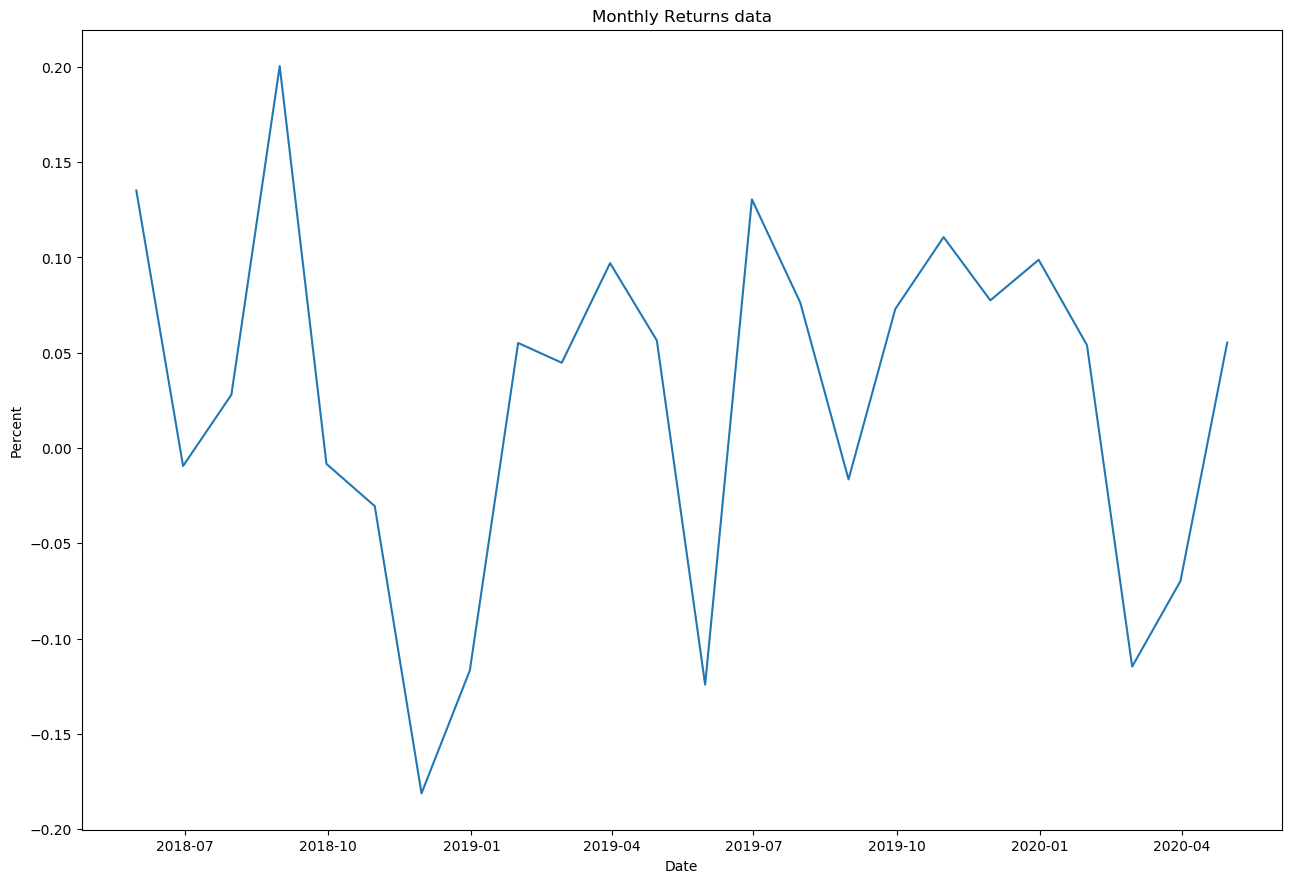

In [76]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
fig.set_size_inches(15.0, 10.0)
ax1.plot(monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Monthly Returns data")
plt.show()

##### After looking at the daily returns chart for Netflix we can conclude that the returns are quite volatile and the stock can move +/- 10% on any given day. To get a sense of how extreme the returns can be we can plot a histogram.

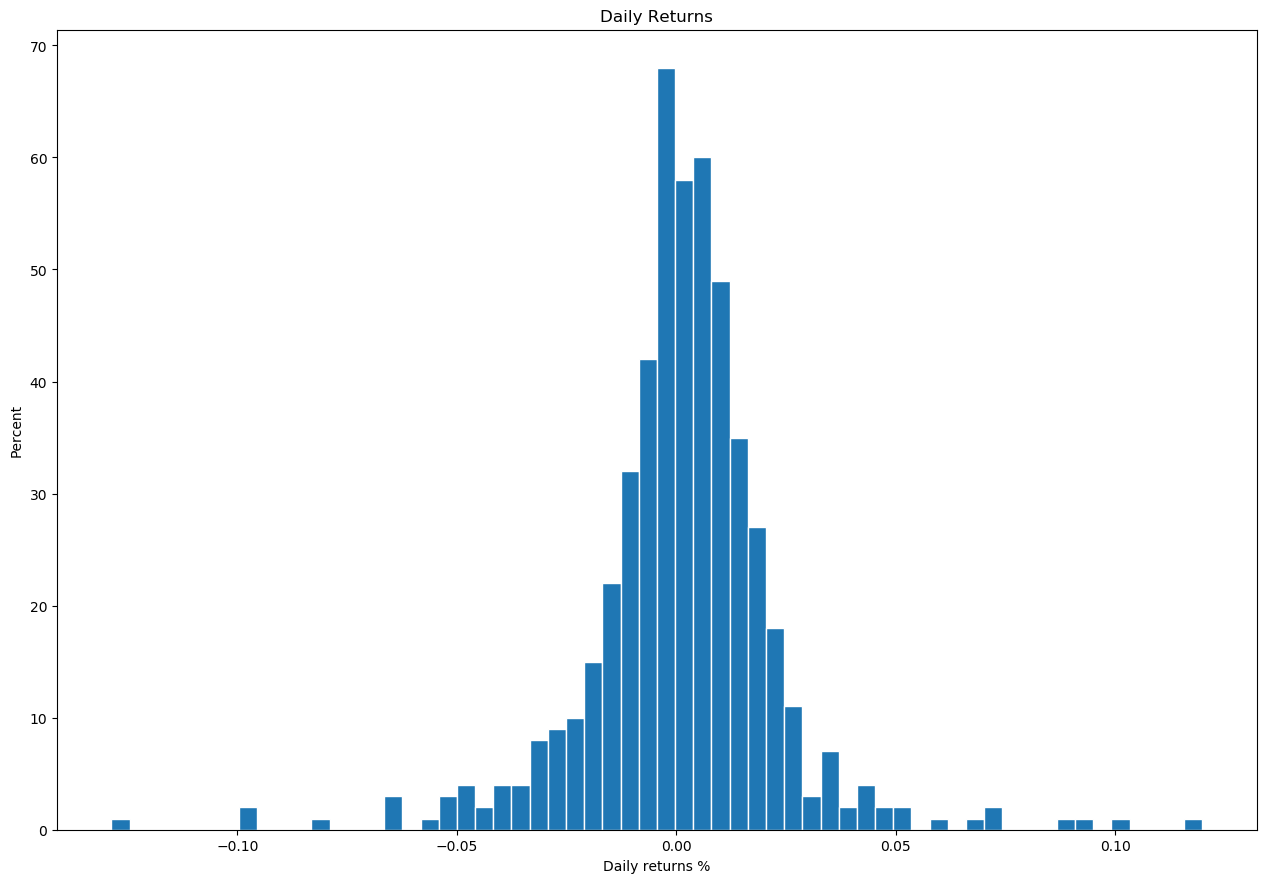

In [78]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
fig.set_size_inches(15.0, 10.0)
daily_returns.plot.hist(bins = 60, edgecolor='white')
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Daily Returns")
plt.show()

##### Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or in other words, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the cumprod() function.

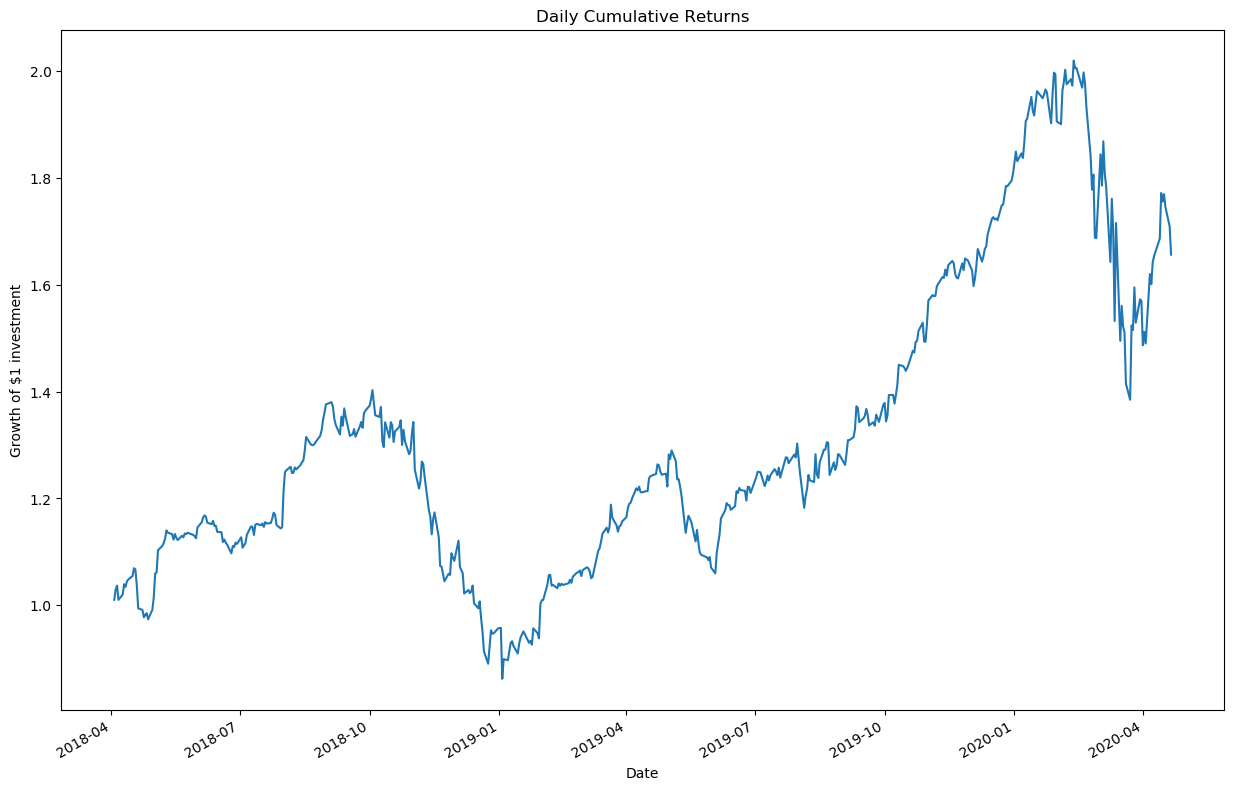

In [79]:
cumulative_returns = (daily_returns+1).cumprod()
fig= plt.figure(figsize=(15,10))
ax1 = cumulative_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Daily Cumulative Returns")
ax1